In [1]:
%matplotlib inline
import pycountry
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
#To get the names of countries
list = [country.name for country in pycountry.countries]
#To get the CountryCode
list1=[country.alpha_2 for country in pycountry.countries]

In [3]:
#Countries_Data = pd.DataFrame(list,columns={"Country"})
Countries_Data=pd.DataFrame(list1,columns={"CountryCode"})
Countries_Data

,CountryCode
0,AW
1,AF
2,AO
3,AI
4,AX
...,...
244,WS
245,YE
246,ZA
247,ZM


In [6]:
url = "https://api.covid19api.com/summary"
response = requests.get("https://api.covid19api.com/summary").json()
Global_Data = dict(response["Global"])
Global_df = pd.DataFrame([Global_Data])
Global = Global_df.transpose()
Global.reset_index(inplace=True)
Global = Global.rename(columns={0:"Count","index":"Category"})

Global.sort_values('Category',ascending=False,inplace=True)
Global_New=Global.head(3)
    #print(json.dumps(response,indent=4,sort_keys=True))

In [7]:
Global_New

,Category,Count
5,TotalRecovered,10131931
3,TotalDeaths,673161
1,TotalConfirmed,17305183


In [8]:
Counts = Global_New["Count"]
Category = Global_New["Category"]

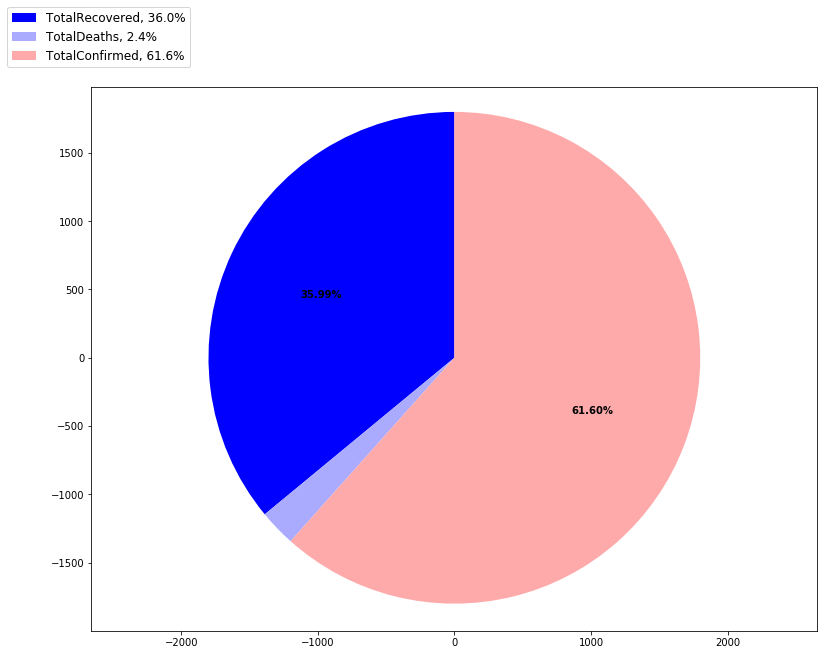

In [16]:
fig1, ax1 = plt.subplots(figsize=(10,10))    #https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothi 
NUM_COLORS = len(Counts)
labels = [labels for labels in Category]
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(Counts)) for i in range(len(Counts))])
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    Counts, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000,frame=True)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(Counts)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, Counts)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
# fig1.set_size_inches(18.5, 10.5)
fig1.savefig("GLOBAL SUMMARY IMAGES/New_chart.png")

In [9]:

New = response["Countries"]
Data = pd.DataFrame(New)
Merge = pd.merge(Countries_Data,Data,on="CountryCode",how="inner")

In [10]:
Merge

,CountryCode,Country,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,AF,Afghanistan,afghanistan,71,36542,0,1271,82,25471,2020-07-31T19:34:57Z,{}
1,AO,Angola,angola,31,1109,3,51,94,395,2020-07-31T19:34:57Z,{}
2,AL,Albania,albania,92,5197,4,154,53,2883,2020-07-31T19:34:57Z,{}
3,AD,Andorra,andorra,4,922,0,52,2,806,2020-07-31T19:34:57Z,{}
4,AE,United Arab Emirates,united-arab-emirates,302,60223,2,349,424,53626,2020-07-31T19:34:57Z,{}
...,...,...,...,...,...,...,...,...,...,...,...
180,VN,Viet Nam,vietnam,50,509,0,0,4,373,2020-07-31T19:34:57Z,{}
181,YE,Yemen,yemen,15,1726,2,487,7,856,2020-07-31T19:34:57Z,{}
182,ZA,South Africa,south-africa,11046,482169,315,7812,11634,309601,2020-07-31T19:34:57Z,{}
183,ZM,Zambia,zambia,306,5555,3,149,4,3289,2020-07-31T19:34:57Z,{}


In [11]:
Total_Summary = Merge[["Country","CountryCode","TotalConfirmed","TotalRecovered","TotalDeaths"]]
Total_Summary

,Country,CountryCode,TotalConfirmed,TotalRecovered,TotalDeaths
0,Afghanistan,AF,36542,25471,1271
1,Angola,AO,1109,395,51
2,Albania,AL,5197,2883,154
3,Andorra,AD,922,806,52
4,United Arab Emirates,AE,60223,53626,349
...,...,...,...,...,...
180,Viet Nam,VN,509,373,0
181,Yemen,YE,1726,856,487
182,South Africa,ZA,482169,309601,7812
183,Zambia,ZM,5555,3289,149


In [13]:
lat_lng = pd.read_csv("lat and lng.csv")
Country_lat_lng=lat_lng[["country_code","latitude","longitude"]]
Country_lat_lng

,country_code,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.939110,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615
...,...,...,...
240,YE,15.552727,48.516388
241,YT,-12.827500,45.166244
242,ZA,-30.559482,22.937506
243,ZM,-13.133897,27.849332


In [14]:
Country_lat_lng.rename(columns={"country_code": "CountryCode"},inplace=True)
Country_lat_lng

,CountryCode,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.939110,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615
...,...,...,...
240,YE,15.552727,48.516388
241,YT,-12.827500,45.166244
242,ZA,-30.559482,22.937506
243,ZM,-13.133897,27.849332


In [15]:
New_df = pd.merge(Country_lat_lng,Total_Summary,on="CountryCode",how="inner")
New_df

,CountryCode,latitude,longitude,Country,TotalConfirmed,TotalRecovered,TotalDeaths
0,AD,42.546245,1.601554,Andorra,922,806,52
1,AE,23.424076,53.847818,United Arab Emirates,60223,53626,349
2,AF,33.939110,67.709953,Afghanistan,36542,25471,1271
3,AG,17.060816,-61.796428,Antigua and Barbuda,91,67,3
4,AL,41.153332,20.168331,Albania,5197,2883,154
...,...,...,...,...,...,...,...
178,VN,14.058324,108.277199,Viet Nam,509,373,0
179,YE,15.552727,48.516388,Yemen,1726,856,487
180,ZA,-30.559482,22.937506,South Africa,482169,309601,7812
181,ZM,-13.133897,27.849332,Zambia,5555,3289,149


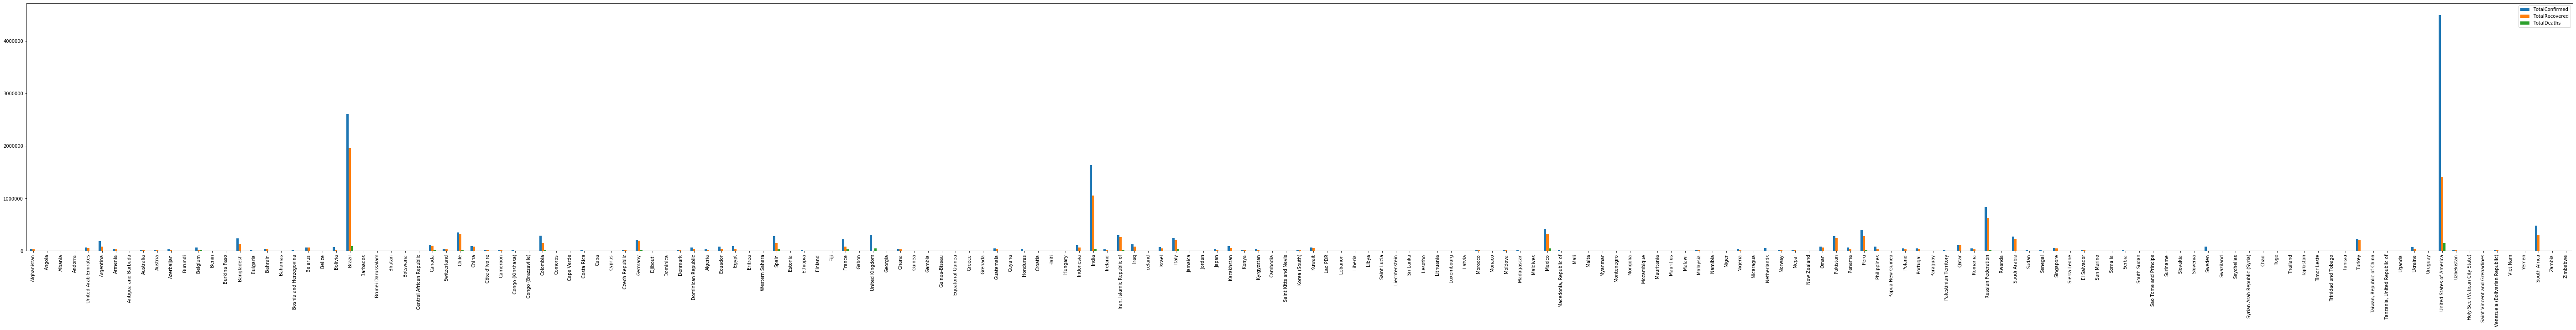

<Figure size 576x216 with 0 Axes>

In [16]:
multiplot=Total_Summary.plot(kind='bar',figsize=(100,10))
multiplot.set_xticklabels(Total_Summary["Country"],rotation=90)
plt.show()
plt.tight_layout()
#plt.savefig("GLOBAL SUMMARY IMAGES/barplot.png")
fig = plt.gcf()
fig.set_size_inches(8,3)
plt.savefig("GLOBAL SUMMARY IMAGES/barplot.png")
plt.show()



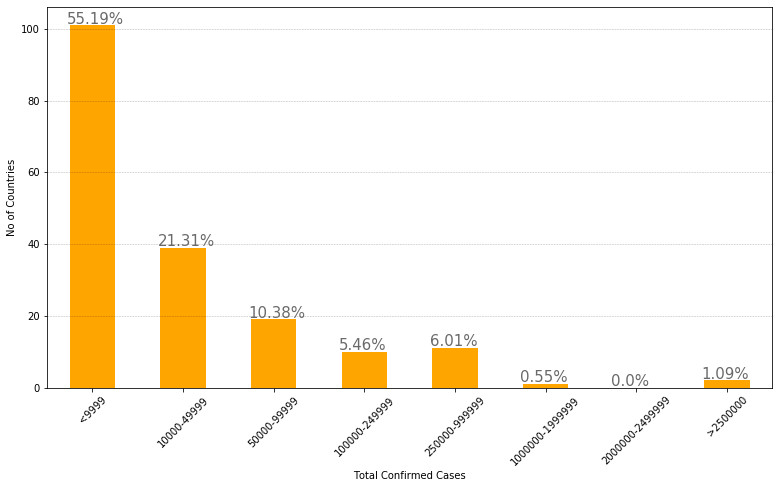

In [17]:
bins = [0,10000,50000,100000,250000,1000000,2000000,2500000,5000000]

# Create the names for the five bins
group_names = ["<9999","10000-49999","50000-99999","100000-249999","250000-999999","1000000-1999999","2000000-2499999",">2500000"]

out=pd.cut(New_df["TotalConfirmed"],bins,labels=group_names,include_lowest=True)
axis = out.value_counts(sort=False)
#fig,ax=plt.subplots()
totals=[]
ax=axis.plot.bar(rot=45, color="orange", figsize=(13,7))
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
    
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

#ax.invert_yaxis()
plt.xlabel("Total Confirmed Cases")
plt.ylabel("No of Countries")
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.savefig("GLOBAL SUMMARY IMAGES/Total_Confirmed_bar.png")

In [19]:
New_df.head()

,CountryCode,latitude,longitude,Country,TotalConfirmed,TotalRecovered,TotalDeaths
0,AD,42.546245,1.601554,Andorra,922,806,52
1,AE,23.424076,53.847818,United Arab Emirates,60223,53626,349
2,AF,33.939110,67.709953,Afghanistan,36542,25471,1271
3,AG,17.060816,-61.796428,Antigua and Barbuda,91,67,3
4,AL,41.153332,20.168331,Albania,5197,2883,154


In [22]:
import plotly.tools as tl
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#World Map with Total Confirmed and Total Recovered
fig = px.scatter_mapbox(New_df, title="World Map with Total Confirmedand Total Recovered",  lat="latitude", lon="longitude", hover_name="Country", hover_data=["TotalRecovered", "TotalConfirmed"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title_x=0.5,
    title_y=0.95,
    mapbox={"style": "carto-positron", "center": {"lon": 2, "lat" : 47}, "zoom": 4.8},
    margin={"l": 0, "r": 0, "b": 0, "t": 0})
fig.show()
fig.write_html('first_figure2.html', auto_open=True)